# Introduction  ⏬
 1. About Dataset
 2. Data Columns
 3. Importing Libraries
 4. Questions for Analysis
 
<img src ='https://trgrestaurantconsulting.com/wp-content/uploads/2019/02/Restaurant-Revenue.png' >

## About Dataset ▶
>TFI has provided a dataset with 137 restaurants in the training set, and a test set of 100000 restaurants. The data columns include the open date, location, city type, and three categories of obfuscated data: Demographic data, Real estate data, and Commercial data. The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. 

> Dataset is splited two csv files (train.csv - test.csv).

> **Dataset link :** https://www.kaggle.com/competitions/restaurant-revenue-prediction/data

## Data Fields ⚡

1. Id : Restaurant id. 
2. Open Date : opening date for a restaurant
2. City : City that the restaurant is in. Note that there are unicode in the names. 
3. City Group: Type of the city. Big cities, or Other. 
4. Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
5. P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
6. Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

## Import Libraries ♦

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
%matplotlib inline
sns.set(rc={'figure.figsize':(15, 8)}, font_scale=1.3)

## Questions For Analysis ❔ 

**Some questions we'll try to answer them to understand the data and our problem**

---


>*    Q1 : Which Type of Restaurants that is Most Popular ? 
>*    Q2 : Does Season Affect on Opening Resturant ?
>*    Q3 : Is Number of Restaurants More in Big Cities ?
>*    Q4 : Is Restaurants in Big Cities has More Revenue ?
>*    Q5 :What is the State of Restaurants over the last years ?
>*    Q6 : Which Cities Whom Restaurants have highest Revenue ? (Top 5)
>*    Q7 : Which Cities Whom Restaurants have lowest Revenue ? (Top 5)
>*    Q8 : Does Resturaunt Age Affect on Revenue ?

<a id='wrangling'></a>
# Data Wrangling ⛔
1. Accessing Data
2. Data Cleaning

## Accessing Data 👓

In [ ]:
train = pd.read_csv('train.csv')
train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [ ]:
train.sample(10)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
18,18,04/21/2012,İzmir,Big Cities,IL,4,5.0,4.0,3.0,1,...,3.0,3,5,5,4,4,4,3,2,5337526.0
51,51,11/08/2011,Kastamonu,Other,IL,2,2.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,3273041.0
96,96,11/27/2011,Diyarbakır,Other,FC,4,5.0,2.0,4.0,2,...,2.0,0,0,0,0,0,0,0,0,6412623.0
120,120,08/18/2011,Aydın,Other,FC,2,3.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,4067566.0
50,50,05/01/2010,Ankara,Big Cities,IL,3,5.0,4.0,5.0,3,...,3.0,5,2,3,2,2,2,3,3,2156098.0
106,106,06/15/2008,Antalya,Other,FC,3,3.0,6.0,6.0,4,...,7.5,0,0,0,0,0,0,0,0,4888774.0
110,110,09/26/2012,Amasya,Other,IL,6,3.0,6.0,6.0,4,...,7.5,15,3,15,6,18,12,16,6,2954086.0
13,13,10/16/2010,İstanbul,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,4807746.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
43,43,09/24/2009,Ankara,Big Cities,FC,2,4.0,5.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,2732645.0


In [ ]:
test = pd.read_csv('test.csv')
test

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,01/05/2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
99996,99996,07/18/2011,Niğde,Other,IL,1,2.0,4.0,3.0,1,...,1.0,3.0,5,0,0,0,4,0,0,0
99997,99997,12/29/2012,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,...,4.0,1.0,5,5,3,2,4,4,4,2
99998,99998,10/12/2013,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,...,7.5,5.0,0,0,0,4,0,0,0,0


In [ ]:
test.sample(10)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
58316,58316,10/28/2012,İstanbul,Big Cities,FC,4,5.0,4.0,4.0,2,...,4.0,2.0,1,1,1,0,3,1,3,5
35522,35522,11/13/2009,İstanbul,Big Cities,FC,3,4.0,4.0,5.0,3,...,2.0,1.0,0,0,0,0,0,0,0,0
62895,62895,10/10/2011,Ankara,Big Cities,FC,2,4.0,4.0,5.0,1,...,1.0,7.5,0,0,0,0,0,0,0,0
30969,30969,02/21/2013,Malatya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
66629,66629,02/07/2009,Diyarbakır,Other,FC,2,3.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
54054,54054,07/10/2013,İzmir,Big Cities,IL,5,5.0,3.0,5.0,2,...,3.0,3.0,4,0,0,0,0,0,0,1
55819,55819,09/26/2009,Antalya,Other,FC,4,5.0,4.0,4.0,1,...,5.0,2.0,0,0,0,0,0,0,0,0
44125,44125,04/12/1997,Bursa,Other,FC,4,5.0,6.0,4.0,2,...,10.0,7.5,0,0,5,0,3,0,0,2
91391,91391,06/01/2010,İstanbul,Big Cities,FC,4,6.0,4.0,5.0,2,...,5.0,0.0,4,4,3,0,4,5,4,0
57721,57721,10/24/2006,Ankara,Big Cities,FC,12,7.5,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0


In [ ]:
# Checking if train data and test data contain same number columns 
print('Number of columns in Training Data : ',len(train.columns))
print('Number of columns in Training Data : ',len(test.columns))

print('If they\'re same ?',len(train.columns)  == len(test.columns))

Number of columns in Training Data :  43
Number of columns in Training Data :  42
If they're same ? False



Adding two files in one dataframe for
1. Understanding Data 
2. Do Preprocessing and Data Cleaning one Time

Note : We'll build ML model on Train Data only (as it contain our Dependent Variable 'Revenue')


In [ ]:
df = pd.concat([train,test])
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,01/05/2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,NaN
99996,99996,07/18/2011,Niğde,Other,IL,1,2.0,4.0,3.0,1,...,3.0,5,0,0,0,4,0,0,0,NaN
99997,99997,12/29/2012,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,...,1.0,5,5,3,2,4,4,4,2,NaN
99998,99998,10/12/2013,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,...,5.0,0,0,0,4,0,0,0,0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100137 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100137 non-null  int64  
 1   Open Date   100137 non-null  object 
 2   City        100137 non-null  object 
 3   City Group  100137 non-null  object 
 4   Type        100137 non-null  object 
 5   P1          100137 non-null  int64  
 6   P2          100137 non-null  float64
 7   P3          100137 non-null  float64
 8   P4          100137 non-null  float64
 9   P5          100137 non-null  int64  
 10  P6          100137 non-null  int64  
 11  P7          100137 non-null  int64  
 12  P8          100137 non-null  int64  
 13  P9          100137 non-null  int64  
 14  P10         100137 non-null  int64  
 15  P11         100137 non-null  int64  
 16  P12         100137 non-null  int64  
 17  P13         100137 non-null  float64
 18  P14         100137 non-null  int64  
 19  P15

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,100137.0,4.993119e+04,2.890688e+04,0.0,24897.0,49931.0,74965.0,99999.0
P1,100137.0,4.087930e+00,2.813085e+00,1.0,2.0,3.0,4.0,15.0
P2,100137.0,4.428059e+00,1.428979e+00,1.0,4.0,5.0,5.0,7.5
P3,100137.0,4.215465e+00,8.424524e-01,0.0,4.0,4.0,4.0,7.5
P4,100137.0,4.395992e+00,1.035796e+00,2.0,4.0,4.0,5.0,7.5
P5,100137.0,1.989614e+00,1.065518e+00,1.0,1.0,2.0,2.0,8.0
P6,100137.0,2.882551e+00,1.532502e+00,1.0,2.0,2.0,4.0,10.0
P7,100137.0,5.300678e+00,2.178739e+00,1.0,5.0,5.0,5.0,10.0
P8,100137.0,4.931304e+00,1.718699e+00,1.0,4.0,5.0,5.0,10.0
P9,100137.0,5.251645e+00,1.702825e+00,4.0,4.0,5.0,5.0,10.0


In [ ]:
df.isnull().sum()

Id                 0
Open Date          0
City               0
City Group         0
Type               0
P1                 0
P2                 0
P3                 0
P4                 0
P5                 0
P6                 0
P7                 0
P8                 0
P9                 0
P10                0
P11                0
P12                0
P13                0
P14                0
P15                0
P16                0
P17                0
P18                0
P19                0
P20                0
P21                0
P22                0
P23                0
P24                0
P25                0
P26                0
P27                0
P28                0
P29                0
P30                0
P31                0
P32                0
P33                0
P34                0
P35                0
P36                0
P37                0
revenue       100000
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]

Id            0.000000
Open Date     0.000000
City          0.000000
City Group    0.000000
Type          0.000000
P1            0.000000
P2            0.000000
P3            0.000000
P4            0.000000
P5            0.000000
P6            0.000000
P7            0.000000
P8            0.000000
P9            0.000000
P10           0.000000
P11           0.000000
P12           0.000000
P13           0.000000
P14           0.000000
P15           0.000000
P16           0.000000
P17           0.000000
P18           0.000000
P19           0.000000
P20           0.000000
P21           0.000000
P22           0.000000
P23           0.000000
P24           0.000000
P25           0.000000
P26           0.000000
P27           0.000000
P28           0.000000
P29           0.000000
P30           0.000000
P31           0.000000
P32           0.000000
P33           0.000000
P34           0.000000
P35           0.000000
P36           0.000000
P37           0.000000
revenue       0.998632
dtype: floa

We can't handle missing values in Revenue column as it's our dependent variable that can't be imputed

In [ ]:
for col in df.columns :
  print("Unique Values in "+ col+" Column")
  print('-'*100)
  print(train[col].unique())
  print('-'*100)


Unique Values in Id Column
----------------------------------------------------------------------------------------------------
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136]
----------------------------------------------------------------------------------------------------
Unique Values in Open Date Column
----------------------------------------------------------------------------------------------------
['07/17/1999' '02/14/2008' '03/09/2013' '02/02/2012' '05/09/2009'
 '02/12/2010'

## Data Cleaning ☯
1. Removing Unnecessary Columns
4. Converting  datatype of 	Open Date Column to datatype of datatime
5. Fixing Structural Problems

### 1. Removing Unnecessary Columns

In [ ]:
df.drop(['Id'],axis=1 , inplace=True)

In [ ]:
df

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,01/05/2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,NaN
99996,07/18/2011,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,...,3.0,5,0,0,0,4,0,0,0,NaN
99997,12/29/2012,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,...,1.0,5,5,3,2,4,4,4,2,NaN
99998,10/12/2013,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,...,5.0,0,0,0,4,0,0,0,0,NaN


### Converting  datatype of 	Open Date Column to datatype of datatime

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100137 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Open Date   100137 non-null  object 
 1   City        100137 non-null  object 
 2   City Group  100137 non-null  object 
 3   Type        100137 non-null  object 
 4   P1          100137 non-null  int64  
 5   P2          100137 non-null  float64
 6   P3          100137 non-null  float64
 7   P4          100137 non-null  float64
 8   P5          100137 non-null  int64  
 9   P6          100137 non-null  int64  
 10  P7          100137 non-null  int64  
 11  P8          100137 non-null  int64  
 12  P9          100137 non-null  int64  
 13  P10         100137 non-null  int64  
 14  P11         100137 non-null  int64  
 15  P12         100137 non-null  int64  
 16  P13         100137 non-null  float64
 17  P14         100137 non-null  int64  
 18  P15         100137 non-null  int64  
 19  P16

In [ ]:
df['Open Date'] = pd.to_datetime(df['Open Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100137 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Open Date   100137 non-null  datetime64[ns]
 1   City        100137 non-null  object        
 2   City Group  100137 non-null  object        
 3   Type        100137 non-null  object        
 4   P1          100137 non-null  int64         
 5   P2          100137 non-null  float64       
 6   P3          100137 non-null  float64       
 7   P4          100137 non-null  float64       
 8   P5          100137 non-null  int64         
 9   P6          100137 non-null  int64         
 10  P7          100137 non-null  int64         
 11  P8          100137 non-null  int64         
 12  P9          100137 non-null  int64         
 13  P10         100137 non-null  int64         
 14  P11         100137 non-null  int64         
 15  P12         100137 non-null  int64         
 16  P13

 ### Fixing Structural Problems

In [ ]:
df['Type'].unique()

array(['IL', 'FC', 'DT', 'MB'], dtype=object)

In [ ]:
map_type = {
     'FC' : 'Food Court',
     'IL': 'Inline' ,
     'DT': 'Drive Thru' ,
     'MB' : 'Mobile'
}

In [ ]:
df['Type']= df['Type'].map(map_type)

In [ ]:
df['Type'].unique()

array(['Inline', 'Food Court', 'Drive Thru', 'Mobile'], dtype=object)

In [ ]:
df.select_dtypes('object')

,City,City Group,Type
0,İstanbul,Big Cities,Inline
1,Ankara,Big Cities,Food Court
2,Diyarbakır,Other,Inline
3,Tokat,Other,Inline
4,Gaziantep,Other,Inline
...,...,...,...
99995,Antalya,Other,Food Court
99996,Niğde,Other,Inline
99997,İstanbul,Big Cities,Inline
99998,İstanbul,Big Cities,Food Court


In [ ]:
df[df['City Group'] == 'Big Cities']['City'].unique()

array(['İstanbul', 'Ankara', 'İzmir'], dtype=object)

# Feature Engineering ☑


## Date and Time Features ⌚ 
> 1. Extract year , month , day from date
> 2. Calculate Resturant Opening Years
> 3. Extract Season from month

In [ ]:
df['Open Date']

0       1999-07-17
1       2008-02-14
2       2013-03-09
3       2012-02-02
4       2009-05-09
           ...    
99995   2000-01-05
99996   2011-07-18
99997   2012-12-29
99998   2013-10-12
99999   2010-10-05
Name: Open Date, Length: 100137, dtype: datetime64[ns]

In [ ]:
df['Year'] = df['Open Date'].dt.year
df['Month_Name'] = df['Open Date'].dt.month_name()
df['Day_Name'] = df['Open Date'].dt.day_name()
df['Month'] = df['Open Date'].dt.month
df['Day'] = df['Open Date'].dt.day
df['Resturant Age'] = 2022 - df['Year']

In [ ]:
df

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P35,P36,P37,revenue,Year,Month_Name,Day_Name,Month,Day,Resturant Age
0,1999-07-17,İstanbul,Big Cities,Inline,4,5.0,4.0,4.0,2,2,...,4,3,4,5653753.0,1999,July,Saturday,7,17,23
1,2008-02-14,Ankara,Big Cities,Food Court,4,5.0,4.0,4.0,1,2,...,0,0,0,6923131.0,2008,February,Thursday,2,14,14
2,2013-03-09,Diyarbakır,Other,Inline,2,4.0,2.0,5.0,2,3,...,0,0,0,2055379.0,2013,March,Saturday,3,9,9
3,2012-02-02,Tokat,Other,Inline,6,4.5,6.0,6.0,4,4,...,12,12,6,2675511.0,2012,February,Thursday,2,2,10
4,2009-05-09,Gaziantep,Other,Inline,3,4.0,3.0,4.0,2,2,...,4,3,3,4316715.0,2009,May,Saturday,5,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2000-01-05,Antalya,Other,Food Court,5,5.0,4.0,4.0,2,2,...,0,0,0,NaN,2000,January,Wednesday,1,5,22
99996,2011-07-18,Niğde,Other,Inline,1,2.0,4.0,3.0,1,1,...,0,0,0,NaN,2011,July,Monday,7,18,11
99997,2012-12-29,İstanbul,Big Cities,Inline,4,5.0,4.0,4.0,1,2,...,4,4,2,NaN,2012,December,Saturday,12,29,10
99998,2013-10-12,İstanbul,Big Cities,Food Court,12,7.5,6.0,6.0,4,4,...,0,0,0,NaN,2013,October,Saturday,10,12,9


In [ ]:
df[['Open Date' , 'Year' , 'Resturant Age','Day_Name','Month_Name']]

,Open Date,Year,Resturant Age,Day_Name,Month_Name
0,1999-07-17,1999,23,Saturday,July
1,2008-02-14,2008,14,Thursday,February
2,2013-03-09,2013,9,Saturday,March
3,2012-02-02,2012,10,Thursday,February
4,2009-05-09,2009,13,Saturday,May
...,...,...,...,...,...
99995,2000-01-05,2000,22,Wednesday,January
99996,2011-07-18,2011,11,Monday,July
99997,2012-12-29,2012,10,Saturday,December
99998,2013-10-12,2013,9,Saturday,October


In [ ]:
def map_months(x):
    if x in [12, 1, 2]:
        return 'Winter'
    elif x in [3, 4, 5]:
        return 'Spring'
    elif x in [6, 7, 8]:
        return 'Summer'
    elif x in [9, 10, 11]:
        return 'Autumn'

In [ ]:
df['Season'] = df['Month'].apply(map_months)

In [ ]:
df[['Open Date' , 'Year' , 'Resturant Age',
    'Day_Name','Month_Name' , 'Season',
    'Day' , 'Month']]

,Open Date,Year,Resturant Age,Day_Name,Month_Name,Season,Day,Month
0,1999-07-17,1999,23,Saturday,July,Summer,17,7
1,2008-02-14,2008,14,Thursday,February,Winter,14,2
2,2013-03-09,2013,9,Saturday,March,Spring,9,3
3,2012-02-02,2012,10,Thursday,February,Winter,2,2
4,2009-05-09,2009,13,Saturday,May,Spring,9,5
...,...,...,...,...,...,...,...,...
99995,2000-01-05,2000,22,Wednesday,January,Winter,5,1
99996,2011-07-18,2011,11,Monday,July,Summer,18,7
99997,2012-12-29,2012,10,Saturday,December,Winter,29,12
99998,2013-10-12,2013,9,Saturday,October,Autumn,12,10


In [ ]:
df

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P36,P37,revenue,Year,Month_Name,Day_Name,Month,Day,Resturant Age,Season
0,1999-07-17,İstanbul,Big Cities,Inline,4,5.0,4.0,4.0,2,2,...,3,4,5653753.0,1999,July,Saturday,7,17,23,Summer
1,2008-02-14,Ankara,Big Cities,Food Court,4,5.0,4.0,4.0,1,2,...,0,0,6923131.0,2008,February,Thursday,2,14,14,Winter
2,2013-03-09,Diyarbakır,Other,Inline,2,4.0,2.0,5.0,2,3,...,0,0,2055379.0,2013,March,Saturday,3,9,9,Spring
3,2012-02-02,Tokat,Other,Inline,6,4.5,6.0,6.0,4,4,...,12,6,2675511.0,2012,February,Thursday,2,2,10,Winter
4,2009-05-09,Gaziantep,Other,Inline,3,4.0,3.0,4.0,2,2,...,3,3,4316715.0,2009,May,Saturday,5,9,13,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2000-01-05,Antalya,Other,Food Court,5,5.0,4.0,4.0,2,2,...,0,0,NaN,2000,January,Wednesday,1,5,22,Winter
99996,2011-07-18,Niğde,Other,Inline,1,2.0,4.0,3.0,1,1,...,0,0,NaN,2011,July,Monday,7,18,11,Summer
99997,2012-12-29,İstanbul,Big Cities,Inline,4,5.0,4.0,4.0,1,2,...,4,2,NaN,2012,December,Saturday,12,29,10,Winter
99998,2013-10-12,İstanbul,Big Cities,Food Court,12,7.5,6.0,6.0,4,4,...,0,0,NaN,2013,October,Saturday,10,12,9,Autumn


<a id='eda'></a>
# EDA and Visualization ⛲ 



>*    Q1 : Which Type of Restaurants that is Most Popular ? 
>*    Q2 : Does Season Affect on Opening Resturant ?
>*    Q3 : Is Number of Restaurants More in Big Cities ?
>*    Q4 : Is Restaurants in Big Cities has More Revenue ?
>*    Q5 :What is the State of Restaurants over the last years ?
>*    Q6 : Which Cities Whom Restaurants have highest Revenue ? (Top 5)
>*    Q7 : Does Resturaunt Age Affect on Revenue ?



## Which Type of Restaurants that is Most Popular ?

In [ ]:
df['Type'].value_counts()

Food Court    57095
Inline        40507
Drive Thru     2245
Mobile          290
Name: Type, dtype: int64

In [ ]:
 df['Type'].value_counts()/df.shape[0]

Food Court    0.570169
Inline        0.404516
Drive Thru    0.022419
Mobile        0.002896
Name: Type, dtype: float64

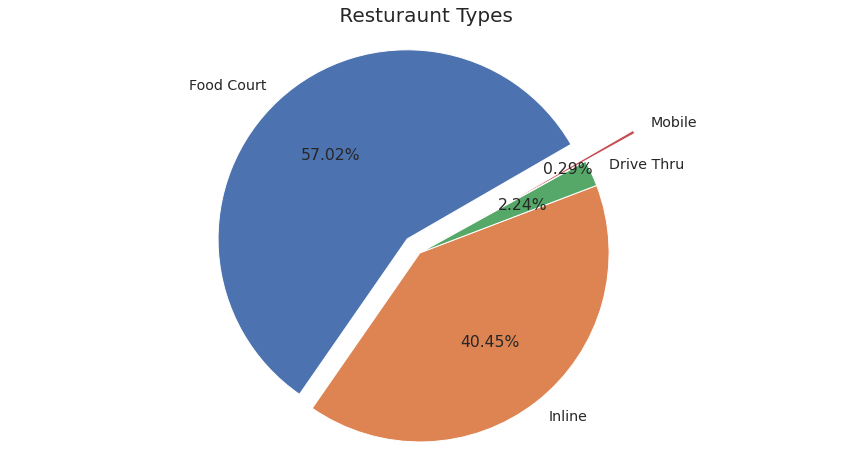

In [ ]:
plt.pie(df['Type'].value_counts(),labels=list(df['Type'].value_counts().index) ,
         autopct='%.2f%%', explode = [0.1,0,0,0.3] , startangle =30)
plt.title(' Resturaunt Types ',size = 20)
plt.axis ('equal')
plt.show()

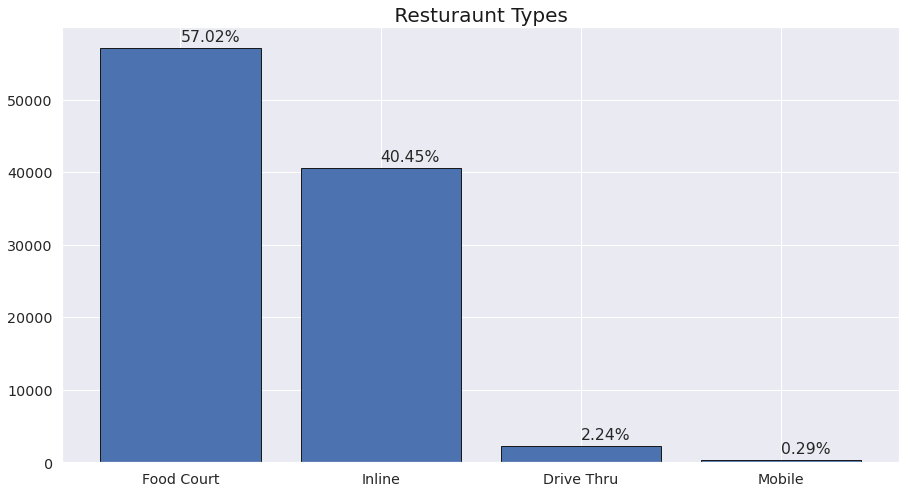

In [ ]:
x= list(df['Type'].value_counts().index)
y= list(df['Type'].value_counts().values)
plt.bar(x, y, facecolor='b',edgecolor='k')
# location of text the value
perct =  list((df['Type'].value_counts().values/df.shape[0])*100)
perct = [round(value,2) for value in perct ]
perct = [str(value) + '%' for value in perct ]
i = 0
for xx , yy in zip(x,y): 
    plt.text(xx,yy+1000, perct[i])
    i+=1

plt.title(' Resturaunt Types ',size = 20 , color ='k')
plt.show()

Con

**Conclusion :**  Most of Resturaunts're  Food Court  With Percentage of 57% and Inline  With Percentage of 40.5% 



##  Does Season Affect on Opening Resturant ?

In [ ]:
df['Season'].value_counts()

Autumn    27726
Summer    26545
Spring    23904
Winter    21962
Name: Season, dtype: int64

In [ ]:
 df['Season'].value_counts()/df.shape[0]

Autumn    0.276881
Summer    0.265087
Spring    0.238713
Winter    0.219320
Name: Season, dtype: float64

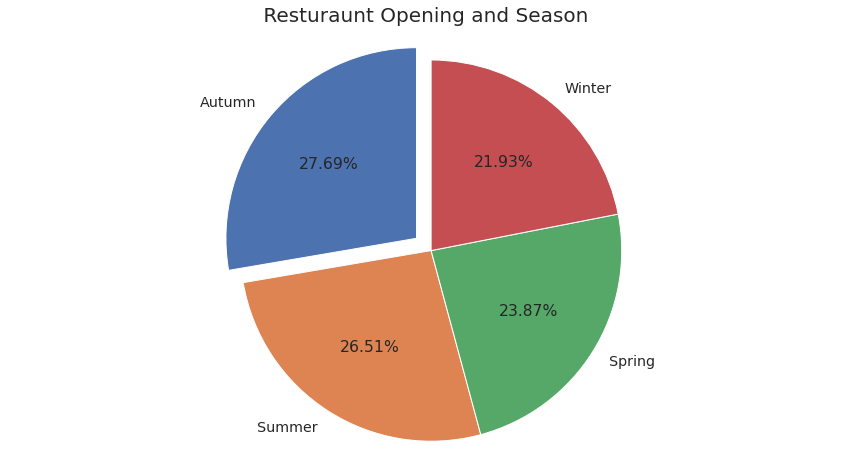

In [ ]:
plt.pie(df['Season'].value_counts(),labels=list(df['Season'].value_counts().index) ,
         autopct='%.2f%%', explode = [0.1,0,0,0] , startangle =90)
plt.title(' Resturaunt Opening and Season ',size = 20)
plt.axis ('equal')
plt.show()

**Conclusion :** 
1. Opening Restaurant did not affect by season as numbers of Opening Restaurants in each season is close to each other

2. Most restaurants has been opened in the Autumn


##  Is Number of Restaurants More in Big Cities ?

In [ ]:
df['City Group'].value_counts()

Other         50787
Big Cities    49350
Name: City Group, dtype: int64

In [ ]:
df['City Group'].value_counts()/df.shape[0]

Other         0.507175
Big Cities    0.492825
Name: City Group, dtype: float64

In [ ]:
list(df['City Group'].unique())
for group in list(df['City Group'].unique()) :
  print('Cities in ' , group , ' :')
  print('---'*10)
  print(df[df['City Group'] == group]['City'].unique())
  num_unique = len(df[df['City Group'] == group]['City'].unique())
  print('---'*10)
  print('Number of Cities in ',group, ' :' ,num_unique)
  print('------' *10)
  print('\n')

Cities in  Big Cities  :
------------------------------
['İstanbul' 'Ankara' 'İzmir']
------------------------------
Number of Cities in  Big Cities  : 3
------------------------------------------------------------


Cities in  Other  :
------------------------------
['Diyarbakır' 'Tokat' 'Gaziantep' 'Afyonkarahisar' 'Edirne' 'Kocaeli'
 'Bursa' 'Sakarya' 'Elazığ' 'Kayseri' 'Eskişehir' 'Şanlıurfa' 'Samsun'
 'Adana' 'Antalya' 'Kastamonu' 'Uşak' 'Muğla' 'Kırklareli' 'Konya'
 'Karabük' 'Tekirdağ' 'Denizli' 'Balıkesir' 'Aydın' 'Amasya' 'Kütahya'
 'Bolu' 'Trabzon' 'Isparta' 'Osmaniye' 'Niğde' 'Rize' 'Düzce' 'Hatay'
 'Erzurum' 'Mersin' 'Zonguldak' 'Malatya' 'Çanakkale' 'Kars' 'Batman'
 'Bilecik' 'Giresun' 'Sivas' 'Kırıkkale' 'Mardin' 'Erzincan' 'Manisa'
 'Kahramanmaraş' 'Yalova' 'Tanımsız' 'Kırşehir' 'Aksaray' 'Nevşehir'
 'Çorum' 'Ordu' 'Artvin' 'Siirt' 'Çankırı']
------------------------------
Number of Cities in  Other  : 60
------------------------------------------------------------




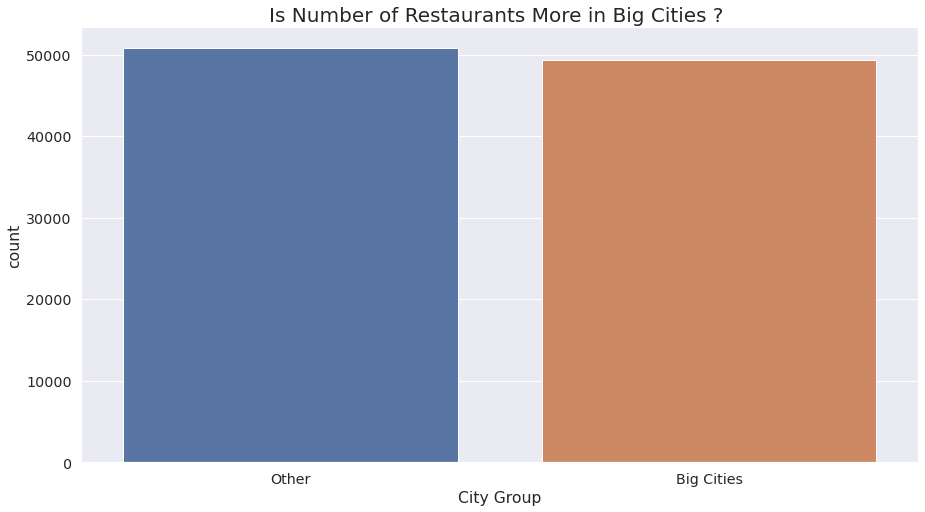

In [ ]:
sns.countplot(x= df['City Group'],order = df['City Group'].value_counts().index )
plt.title('Is Number of Restaurants More in Big Cities ? ',size = 20)
plt.show()

**Conclusion :** 
Number of Restaurants in Big Cities ['İstanbul','Ankara' ,'İzmir'] Contribute 49.3% of All Restaurant Number


 ## Is Restaurants in Big Cities has More Revenue ?

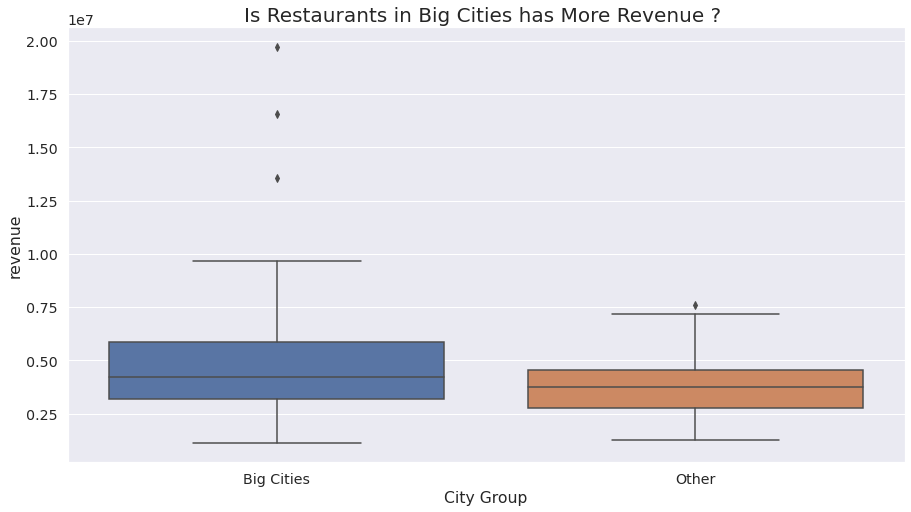

In [ ]:
sns.boxplot(x=df['City Group'] , y=df['revenue'])
plt.title('Is Restaurants in Big Cities has More Revenue ? ',size = 20)
plt.show()

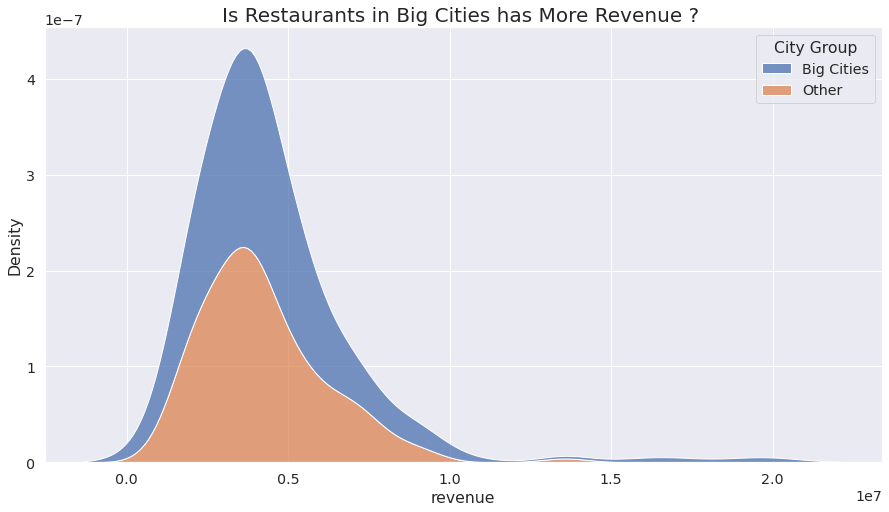

In [ ]:
sns.kdeplot(x=df['revenue'], shade=True , hue = df['City Group']
          , multiple  = 'stack' )
plt.title('Is Restaurants in Big Cities has More Revenue ? ',size = 20)
plt.show()

**Conclusion :** 
Resturaunt Revenue in big cities ['İstanbul' 'Ankara' 'İzmir'] is more than other cities

In [ ]:
list(df['City Group'].unique())
for group in list(df['City Group'].unique()) :
  print( 'In',group , ' :')
  print('---'*10)
  print('Revenue Average = ' , round(df[df['City Group'] == group]['revenue'].mean(),3) )
  print('------' *10)
  print('\n')

In Big Cities  :
------------------------------
Revenue Average =  4983480.077
------------------------------------------------------------


In Other  :
------------------------------
Revenue Average =  3752924.102
------------------------------------------------------------




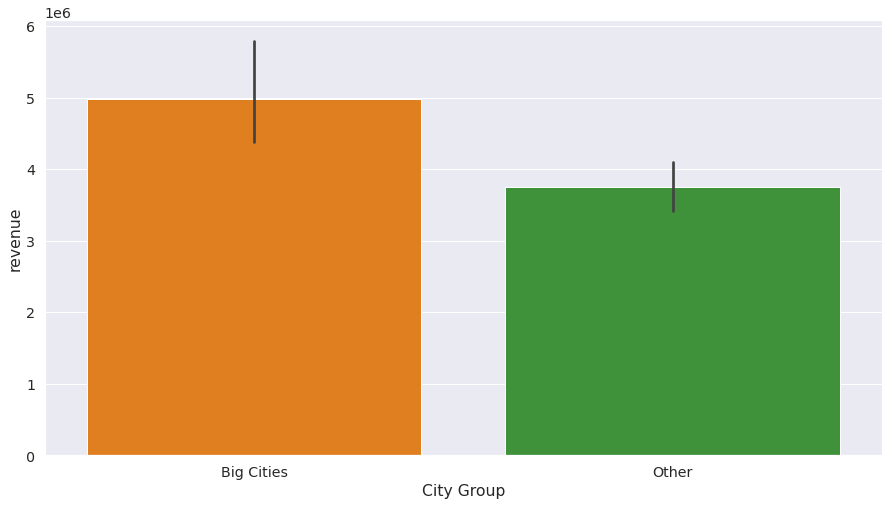

In [ ]:
sns.barplot(x=df['City Group'],y = df['revenue'] , palette='Paired_r')

**Conclusion :** 
1. Resturaunt Revenue in big cities ['İstanbul','Ankara' ,'İzmir'] is more than other cities 

2.   Restaurant Revenue Average in big cities = 4983480.077

3.  Restaurant Revenue Average in other cities = 3752924.102


## What is the State of Restaurants over the last years ?

### Opened Restaurants via Years

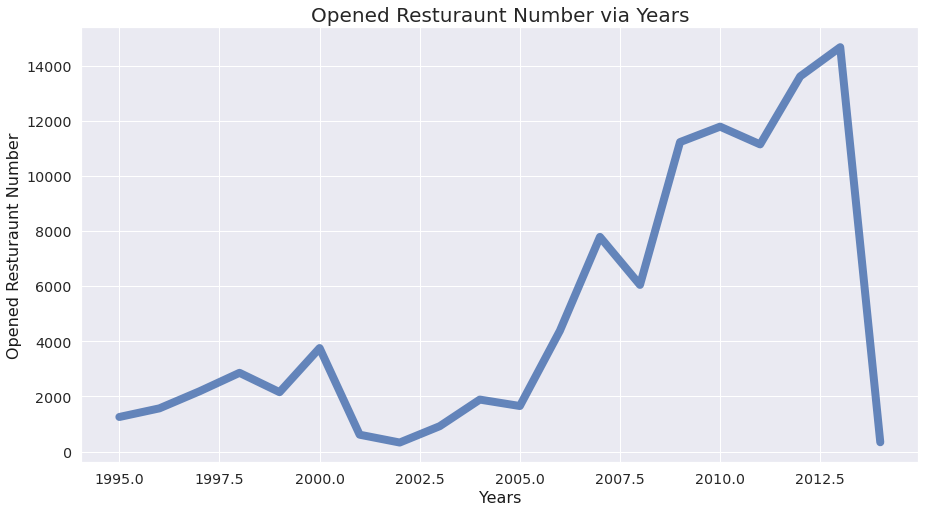

In [ ]:
plt.plot(df.groupby('Year').count()['Open Date'],color = 'b',ls = '-',lw = 8, alpha = 0.85)           
plt.title("Opened Resturaunt Number via Years", size=20 )
# Add  X-axis Label 
plt.xlabel('Years',color = 'k',size=16)
# Add Y-axis Label
plt.ylabel('Opened Resturaunt Number',color = 'k',size=16)
plt.show()

Text(0.5, 1.0, 'Opened Resturaunt Number via Years')

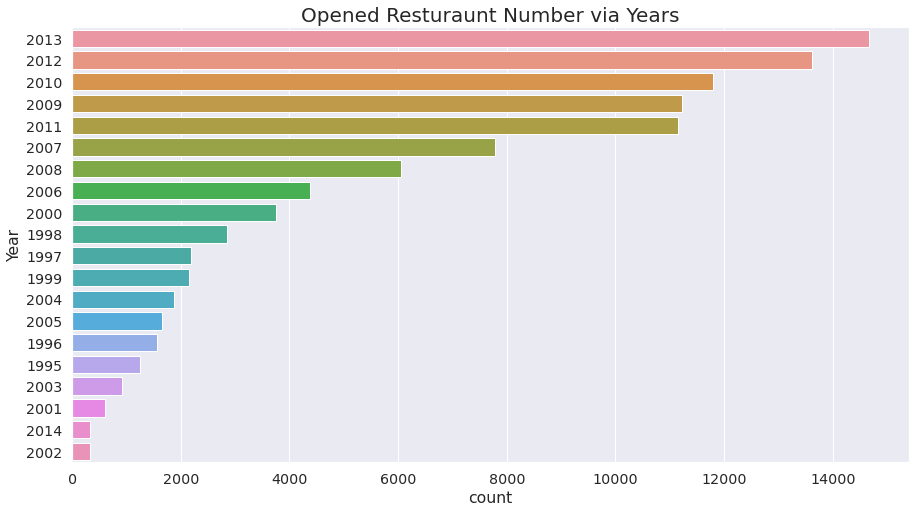

In [ ]:
sns.countplot(y=df['Year'],order =df['Year'].value_counts().index)
plt.title("Opened Resturaunt Number via Years", size=20 )

**Conclusion :** 
1. 2013 is the year in which the largest number of restaurants were opened
2. 2002 is the year in which the smallest number of restaurants were opened

### Revenue via Years

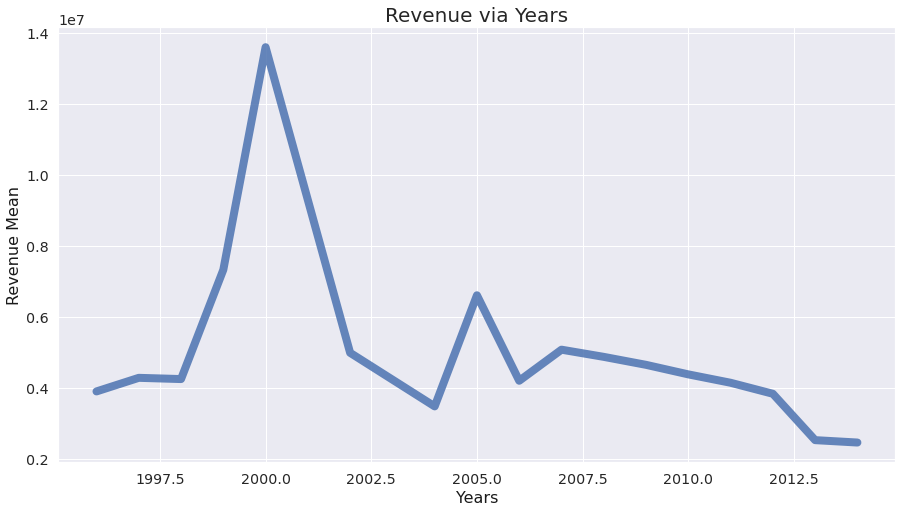

In [ ]:
plt.plot(df.groupby('Year').mean()['revenue'][df.groupby('Year').mean()['revenue'].notnull()]
         ,color = 'b',ls = '-',lw = 8, alpha = 0.85)           
plt.title("Revenue via Years", size=20 )
# Add  X-axis Label 
plt.xlabel('Years',color = 'k',size=16)
# Add Y-axis Label
plt.ylabel('Revenue Mean',color = 'k',size=16)
plt.show()

**Conclusion :** 
2000 is the year in which the highest average of revenue restaurants


## Which Cities Whom Restaurants have highest Revenue ? (Top 5)

Text(0.5, 1.0, 'Top 5 Cities in Revenue')

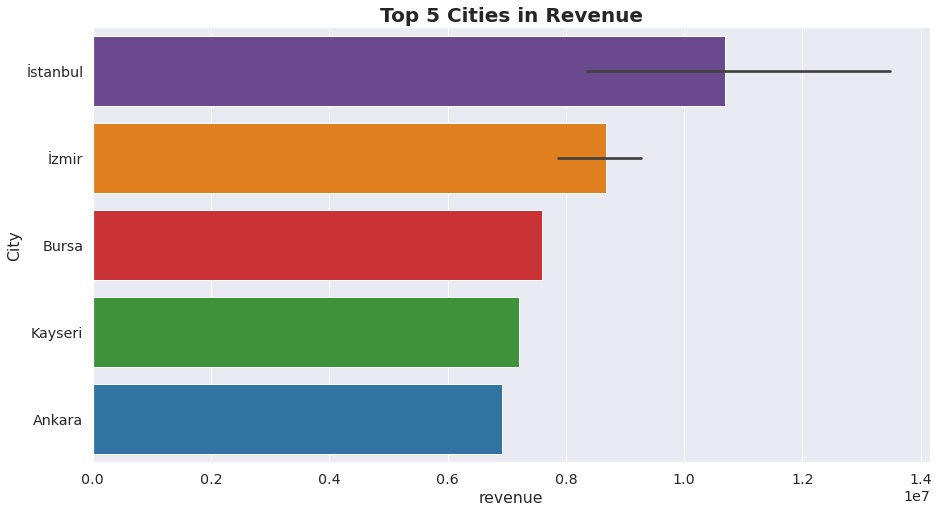

In [ ]:
sns.barplot(y=df.sort_values(by = 'revenue',ascending=False).head(16)['City'],
            x =df.sort_values(by = 'revenue',ascending=False).head(16)['revenue']
            , palette='Paired_r')
plt.title('Top 5 Cities in Revenue',fontdict={'fontweight' : 'bold'},size = 20)

**Conclusion :** Top 5 Cities in Resturaunt Revenue 're İstanbul, İzmir, Bursa, Kayseri and Ankara

## Does Resturaunt Age Affect on Revenue ?

In [ ]:
df[['Resturant Age','revenue']].corr()

,Resturant Age,revenue
Resturant Age,1.00000,0.32614
revenue,0.32614,1.00000


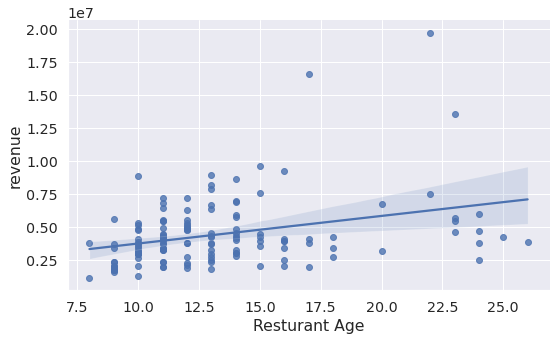

In [ ]:
sns.lmplot(x="Resturant Age", y="revenue", data=df,height=5,aspect=1.6)

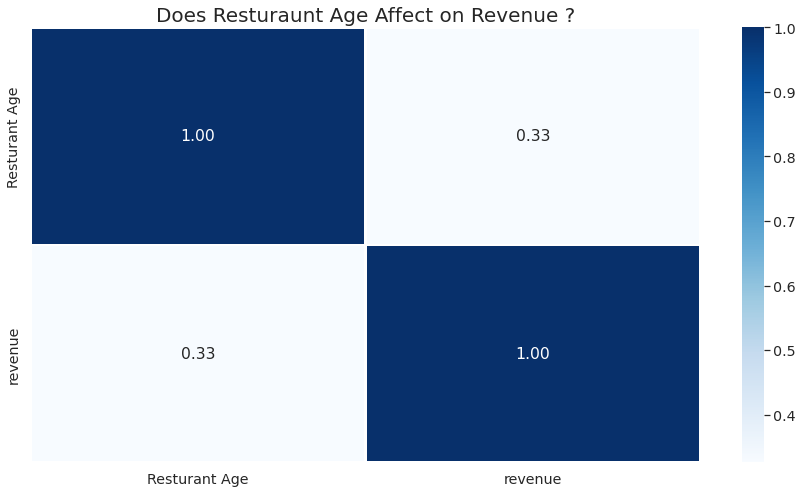

In [ ]:
sns.heatmap(df[['Resturant Age','revenue']].corr() , linewidths=1.5
          ,annot=True,fmt='.2f' , cmap = 'Blues' )
plt.title('Does Resturaunt Age Affect on Revenue ?',size = 20)
plt.show()

**Conclusion :** 
Restaurant age does not significantly affect revenue as they 'are weakly correlated

# Data Preprocessing ⏳

## Handling Categorical Data

In [ ]:
df.corr()['revenue']

P1               0.070217
P2               0.191518
P3              -0.024613
P4               0.035685
P5              -0.028191
P6               0.139094
P7               0.051165
P8              -0.084215
P9              -0.050352
P10             -0.073220
P11              0.084247
P12             -0.062193
P13             -0.105085
P14              0.006441
P15              0.000742
P16             -0.037997
P17              0.067137
P18             -0.034537
P19              0.027984
P20              0.014147
P21              0.097411
P22              0.083562
P23              0.045507
P24              0.014222
P25              0.036365
P26             -0.007650
P27             -0.013680
P28              0.155534
P29             -0.114846
P30             -0.066203
P31             -0.040418
P32             -0.065857
P33             -0.032426
P34             -0.072343
P35             -0.050156
P36             -0.050534
P37             -0.019051
revenue          1.000000
Year        

In [ ]:
train  =  df[df['revenue'].notnull()]

In [ ]:
train.drop('Open Date' ,axis =1 , inplace = True)
train

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P36,P37,revenue,Year,Month_Name,Day_Name,Month,Day,Resturant Age,Season
0,İstanbul,Big Cities,Inline,4,5.0,4.0,4.0,2,2,5,...,3,4,5653753.0,1999,July,Saturday,7,17,23,Summer
1,Ankara,Big Cities,Food Court,4,5.0,4.0,4.0,1,2,5,...,0,0,6923131.0,2008,February,Thursday,2,14,14,Winter
2,Diyarbakır,Other,Inline,2,4.0,2.0,5.0,2,3,5,...,0,0,2055379.0,2013,March,Saturday,3,9,9,Spring
3,Tokat,Other,Inline,6,4.5,6.0,6.0,4,4,10,...,12,6,2675511.0,2012,February,Thursday,2,2,10,Winter
4,Gaziantep,Other,Inline,3,4.0,3.0,4.0,2,2,5,...,3,3,4316715.0,2009,May,Saturday,5,9,13,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,Food Court,2,3.0,3.0,5.0,4,2,4,...,0,0,5787594.0,2008,June,Wednesday,6,25,14,Summer
133,İzmir,Big Cities,Food Court,4,5.0,4.0,4.0,2,3,5,...,0,0,9262754.0,2006,October,Thursday,10,12,16,Autumn
134,Kayseri,Other,Food Court,3,4.0,4.0,4.0,2,3,5,...,0,0,2544857.0,2006,July,Saturday,7,8,16,Summer
135,İstanbul,Big Cities,Food Court,4,5.0,4.0,5.0,2,2,5,...,0,0,7217634.0,2010,October,Friday,10,29,12,Autumn


In [ ]:
map_season = { 'Winter': 1 , 
              'Spring' : 2 , 
              'Summer' : 3 ,
              'Autumn' : 4 }

In [ ]:
train.Season = train.Season.map(map_season)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
train.corr()['revenue']

P1               0.070217
P2               0.191518
P3              -0.024613
P4               0.035685
P5              -0.028191
P6               0.139094
P7               0.051165
P8              -0.084215
P9              -0.050352
P10             -0.073220
P11              0.084247
P12             -0.062193
P13             -0.105085
P14              0.006441
P15              0.000742
P16             -0.037997
P17              0.067137
P18             -0.034537
P19              0.027984
P20              0.014147
P21              0.097411
P22              0.083562
P23              0.045507
P24              0.014222
P25              0.036365
P26             -0.007650
P27             -0.013680
P28              0.155534
P29             -0.114846
P30             -0.066203
P31             -0.040418
P32             -0.065857
P33             -0.032426
P34             -0.072343
P35             -0.050156
P36             -0.050534
P37             -0.019051
revenue          1.000000
Year        

In [ ]:
train = pd.get_dummies(train, columns= ['City Group'])

In [ ]:
train.corr()['revenue']

P1                       0.070217
P2                       0.191518
P3                      -0.024613
P4                       0.035685
P5                      -0.028191
P6                       0.139094
P7                       0.051165
P8                      -0.084215
P9                      -0.050352
P10                     -0.073220
P11                      0.084247
P12                     -0.062193
P13                     -0.105085
P14                      0.006441
P15                      0.000742
P16                     -0.037997
P17                      0.067137
P18                     -0.034537
P19                      0.027984
P20                      0.014147
P21                      0.097411
P22                      0.083562
P23                      0.045507
P24                      0.014222
P25                      0.036365
P26                     -0.007650
P27                     -0.013680
P28                      0.155534
P29                     -0.114846
P30           

## Spliting

In [ ]:
x_train = pd.DataFrame({'Resturant Age':train['Resturant Age'],
                      'Big Cities':train['City Group_Big Cities'], 'Other':train['City Group_Other'],
                      'P2':train['P2'], 'P13':train['P13'], 'P6':train['P6'],
                      'P29':train['P29'], 'P28':train['P28'], 'P26':train['P26']})
x_train

,Resturant Age,Big Cities,Other,P2,P13,P6,P29,P28,P26
0,23,1,0,5.0,5.0,2,3.0,2.0,1.0
1,14,1,0,5.0,5.0,2,3.0,3.0,0.0
2,9,0,1,4.0,5.0,3,3.0,1.0,0.0
3,10,0,1,4.5,7.5,4,7.5,2.5,2.5
4,13,0,1,4.0,5.0,2,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
132,14,0,1,3.0,4.0,2,3.0,2.0,0.0
133,16,1,0,5.0,5.0,3,3.0,3.0,0.0
134,16,0,1,4.0,5.0,3,3.0,2.0,0.0
135,12,1,0,5.0,5.0,2,3.0,3.0,0.0


In [ ]:
y_train = train['revenue']

In [ ]:
y_train

0      5653753.0
1      6923131.0
2      2055379.0
3      2675511.0
4      4316715.0
         ...    
132    5787594.0
133    9262754.0
134    2544857.0
135    7217634.0
136    6363241.0
Name: revenue, Length: 137, dtype: float64

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()

In [ ]:
scalar.fit(x_train)
x_train = scalar.transform(x_train)

In [ ]:
x_train

array([[ 2.41208951,  0.86971849, -0.86971849, ..., -0.08063127,
        -0.531493  , -0.18090592],
       [ 0.1691737 ,  0.86971849, -0.86971849, ..., -0.08063127,
        -0.09677932, -0.5651557 ],
       [-1.07689064, -1.14979733,  1.14979733, ..., -0.08063127,
        -0.96620668, -0.5651557 ],
       ...,
       [ 0.66759943, -1.14979733,  1.14979733, ..., -0.08063127,
        -0.531493  , -0.5651557 ],
       [-0.32925204,  0.86971849, -0.86971849, ..., -0.08063127,
        -0.09677932, -0.5651557 ],
       [-0.08003917,  0.86971849, -0.86971849, ..., -0.08063127,
        -0.09677932, -0.5651557 ]])

# Modelling and Evalution 🚀

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.svm import  SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 

In [ ]:
models  = {
    "LR" : LinearRegression(n_jobs=-1),
    "XGB" : XGBRegressor(n_estimators= 700,n_jobs=-1,objective ='reg:squarederror'),
    "KNN" : KNeighborsRegressor(n_neighbors=7),
    "GradientBoosting"  :  GradientBoostingRegressor(n_estimators=700),
    "DT" : DecisionTreeRegressor(),
    "Random_Forest" : RandomForestRegressor(n_estimators=700,n_jobs=-1)
}

In [ ]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Score: {model.score(x_train, y_train)}')
    print('--'*50)    

Using model: LR
Score: 0.18409653257869496
----------------------------------------------------------------------------------------------------
Using model: XGB
Score: 0.9608224562007859
----------------------------------------------------------------------------------------------------
Using model: KNN
Score: 0.26189582723379834
----------------------------------------------------------------------------------------------------
Using model: GradientBoosting
Score: 0.9784593082723876
----------------------------------------------------------------------------------------------------
Using model: DT
Score: 0.9953529081390022
----------------------------------------------------------------------------------------------------
Using model: Random_Forest
Score: 0.8568799927446975
----------------------------------------------------------------------------------------------------


In [ ]:
model = GradientBoostingRegressor(n_estimators=700)

In [ ]:
model.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=700)

In [ ]:
print('Training Score is : ' , model.score(x_train, y_train))
print( '--'*50)

Training Score is :  0.9784593082723877
----------------------------------------------------------------------------------------------------


In [ ]:
test  =  df[df['revenue'].notnull() == False]
test

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P36,P37,revenue,Year,Month_Name,Day_Name,Month,Day,Resturant Age,Season
0,2011-01-22,Niğde,Other,Food Court,1,4.0,4.0,4.0,1,2,...,0,0,NaN,2011,January,Saturday,1,22,11,Winter
1,2011-03-18,Konya,Other,Inline,3,4.0,4.0,4.0,2,2,...,0,0,NaN,2011,March,Friday,3,18,11,Spring
2,2013-10-30,Ankara,Big Cities,Food Court,3,4.0,4.0,4.0,2,2,...,0,0,NaN,2013,October,Wednesday,10,30,9,Autumn
3,2013-05-06,Kocaeli,Other,Inline,2,4.0,4.0,4.0,2,3,...,0,0,NaN,2013,May,Monday,5,6,9,Spring
4,2013-07-31,Afyonkarahisar,Other,Food Court,2,4.0,4.0,4.0,1,2,...,0,0,NaN,2013,July,Wednesday,7,31,9,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2000-01-05,Antalya,Other,Food Court,5,5.0,4.0,4.0,2,2,...,0,0,NaN,2000,January,Wednesday,1,5,22,Winter
99996,2011-07-18,Niğde,Other,Inline,1,2.0,4.0,3.0,1,1,...,0,0,NaN,2011,July,Monday,7,18,11,Summer
99997,2012-12-29,İstanbul,Big Cities,Inline,4,5.0,4.0,4.0,1,2,...,4,2,NaN,2012,December,Saturday,12,29,10,Winter
99998,2013-10-12,İstanbul,Big Cities,Food Court,12,7.5,6.0,6.0,4,4,...,0,0,NaN,2013,October,Saturday,10,12,9,Autumn


In [ ]:
test.drop(['Open Date','revenue'] ,axis =1 , inplace = True)
test

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P35,P36,P37,Year,Month_Name,Day_Name,Month,Day,Resturant Age,Season
0,Niğde,Other,Food Court,1,4.0,4.0,4.0,1,2,5,...,0,0,0,2011,January,Saturday,1,22,11,Winter
1,Konya,Other,Inline,3,4.0,4.0,4.0,2,2,5,...,0,0,0,2011,March,Friday,3,18,11,Spring
2,Ankara,Big Cities,Food Court,3,4.0,4.0,4.0,2,2,5,...,0,0,0,2013,October,Wednesday,10,30,9,Autumn
3,Kocaeli,Other,Inline,2,4.0,4.0,4.0,2,3,5,...,0,0,0,2013,May,Monday,5,6,9,Spring
4,Afyonkarahisar,Other,Food Court,2,4.0,4.0,4.0,1,2,5,...,0,0,0,2013,July,Wednesday,7,31,9,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Antalya,Other,Food Court,5,5.0,4.0,4.0,2,2,5,...,0,0,0,2000,January,Wednesday,1,5,22,Winter
99996,Niğde,Other,Inline,1,2.0,4.0,3.0,1,1,1,...,0,0,0,2011,July,Monday,7,18,11,Summer
99997,İstanbul,Big Cities,Inline,4,5.0,4.0,4.0,1,2,5,...,4,4,2,2012,December,Saturday,12,29,10,Winter
99998,İstanbul,Big Cities,Food Court,12,7.5,6.0,6.0,4,4,10,...,0,0,0,2013,October,Saturday,10,12,9,Autumn


In [ ]:
test = pd.get_dummies(test, columns= ['City Group'])

In [ ]:
x_test = pd.DataFrame({'Resturant Age':test['Resturant Age'],
                      'Big Cities':test['City Group_Big Cities'], 'Other':test['City Group_Other'],
                      'P2':test['P2'], 'P13':test['P13'], 'P6':test['P6'],
                      'P29':test['P29'], 'P28':test['P28'], 'P26':test['P26']})
x_test

,Resturant Age,Big Cities,Other,P2,P13,P6,P29,P28,P26
0,11,0,1,4.0,4.0,2,3.0,2.0,0.0
1,11,0,1,4.0,5.0,2,3.0,1.0,0.0
2,9,1,0,4.0,5.0,2,3.0,2.0,0.0
3,9,0,1,4.0,5.0,3,3.0,2.0,0.0
4,9,0,1,4.0,4.0,2,3.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,22,0,1,5.0,4.0,2,3.0,2.0,0.0
99996,11,0,1,2.0,5.0,1,3.0,1.0,0.0
99997,10,1,0,5.0,5.0,2,1.0,4.0,4.0
99998,9,1,0,7.5,7.5,4,5.0,7.5,0.0


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([4127581.65365696, 3517389.53018016, 4564837.15551363, ...,
       1669613.38496616, 3519010.00981824, 4383195.28866694])

# Conclusion ❤
* Most of Resturaunts're  Food Court  With Percentage of 57% and Inline  With Percentage of 40.5% 

* Opening Restaurant did not affect by season as numbers of Opening Restaurants in each season is close to each other

* Most restaurants has been opened in the Autumn

* Number of Restaurants in Big Cities ['İstanbul','Ankara' ,'İzmir'] Contribute 49.3% of All Restaurant Number

* Resturaunt Revenue in big cities ['İstanbul' 'Ankara' 'İzmir'] is more than other cities

*  Resturaunt Revenue in big cities ['İstanbul','Ankara' ,'İzmir'] is more than other cities 

*   Restaurant Revenue Average in big cities = 4983480.077

*  Restaurant Revenue Average in other cities = 3752924.102
 
* 2013 is the year in which the largest number of restaurants were opened

* 2002 is the year in which the smallest number of restaurants were opened

* 2000 is the year in which the highest average of revenue restaurants

* Top 5 Cities in Resturaunt Revenue 're İstanbul, İzmir, Bursa, Kayseri and Ankara

* Restaurant age does not significantly affect revenue as they 'are weakly correlated